In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Load data
Churn_data =pd.read_csv("/content/churn_data.csv")
Churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
Cust_data = pd.read_csv("/content/customer_data.csv")
Cust_data

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [4]:
internet_data = pd.read_csv("/content/internet_data.csv")
internet_data

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [5]:
#Merge data
merged_data = pd.merge(Churn_data,Cust_data, on="customerID")
merged_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No


In [6]:
merged_new = pd.merge(merged_data,internet_data,on="customerID")
merged_new.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


#EDA

In [7]:
merged_new.shape

(7043, 21)

In [8]:
merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
merged_new.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
print(merged_new.dtypes)


customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object


In [11]:
merged_new['TotalCharges'] = pd.to_numeric(merged_new['TotalCharges'], errors='coerce')


In [12]:
merged_new.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [13]:
merged_new[merged_new['TotalCharges'].isnull()]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,NaN,No,Male,...,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,NaN,No,Female,...,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,NaN,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,NaN,No,Female,...,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,NaN,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,NaN,No,Male,...,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,NaN,No,Female,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,NaN,No,Male,...,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,NaN,No,Female,...,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [14]:
mean_total_charges = merged_new['TotalCharges'].mean()


In [15]:
merged_new['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [16]:
merged_new.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [17]:
merged_new[merged_new.duplicated()]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


In [18]:
# Iterate over each column
for column in merged_data.columns:
    # Check unique values in the column
    unique_values = merged_new[column].unique()

    # Print the column name and its unique values
    # print(f"Column: {column}")
    print("Unique values for column:", column)
    print(unique_values)
    print()

Unique values for column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values for column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values for column: PhoneService
['No' 'Yes']

Unique values for column: Contract
['Month-to-month' 'One year' 'Two year']

Unique values for column: PaperlessBilling
['Yes' 'No']

Unique values for column: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Unique values for column: MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

Unique values for column: TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Unique values for column: Churn
['No' 'Yes']

Unique values for column: gender
['Female' 'Male']

Unique values for column

In [19]:
#Remove customer id column
merged_new.drop(columns='customerID', inplace=True)

In [20]:
# unique elements of the PaymentMethod column
merged_new.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [21]:
# remove (automatic) from payment method names
merged_new['PaymentMethod'] = merged_new['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
merged_new.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

#Data Visualization

In [22]:
print(merged_new.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


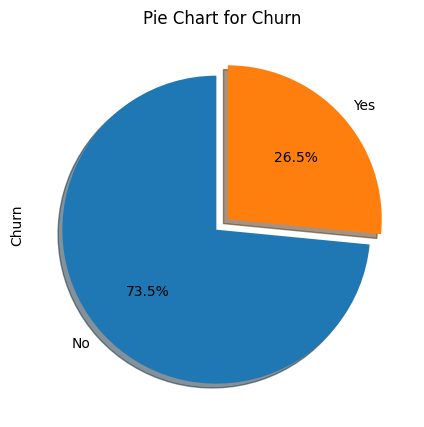

In [23]:
#To get the pie chart to analyze churn
merged_new ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(5,5))
plt.title('Pie Chart for Churn')
plt.show()

Insights:

After analyzing the churn column, we see that 26.5% of customers have churned. As shown above, this is an imbalanced data set because both classes are not equally distributed. When modeling, this imbalance could lead to a large number of false negatives, as we will see later.

In [24]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


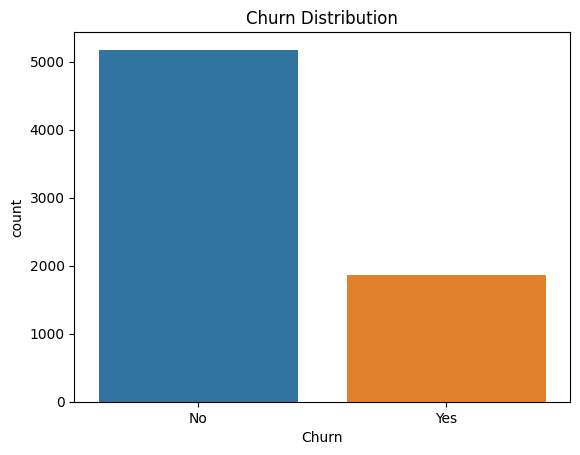

In [25]:
# Distribution of the target variable (Churn)
sns.countplot(data=merged_new, x='Churn')
plt.title('Churn Distribution')
plt.show()

<ipython-input-26-b360c526f76e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_new.corr(), annot=True, cmap='coolwarm')


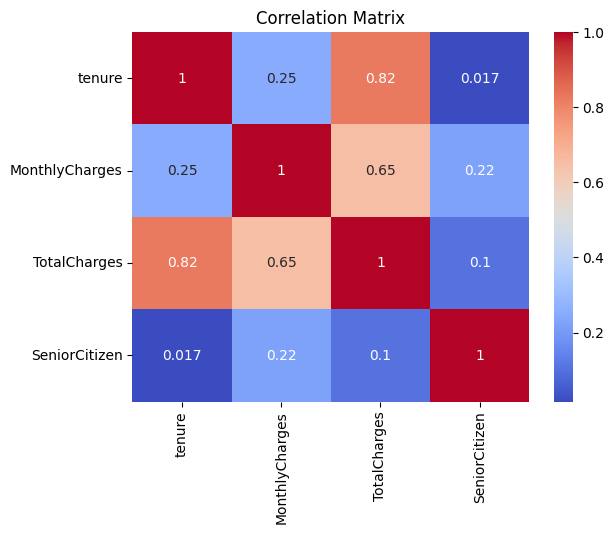

In [26]:
#Correlation Matrix
sns.heatmap(merged_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We see that Total Charges and tenure are highly correalted with a value of 0.82 and similarly monthly charges and total charges are also highly correlated with a value of 0.65. So we can infer that there is multicollinearity here.

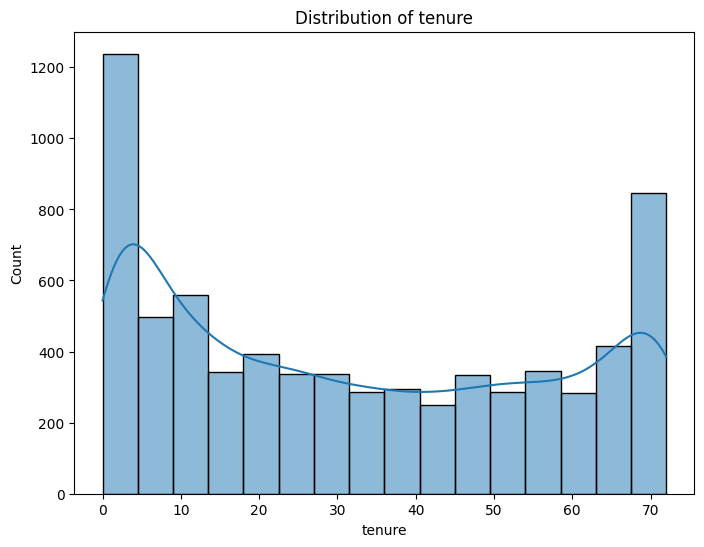

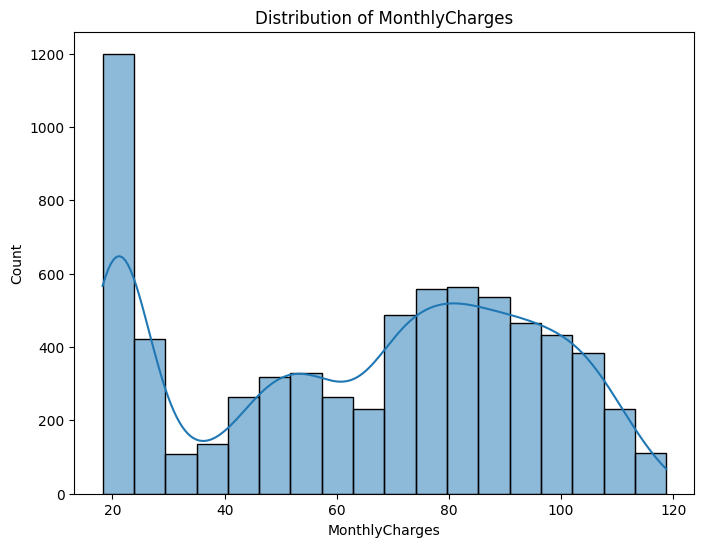

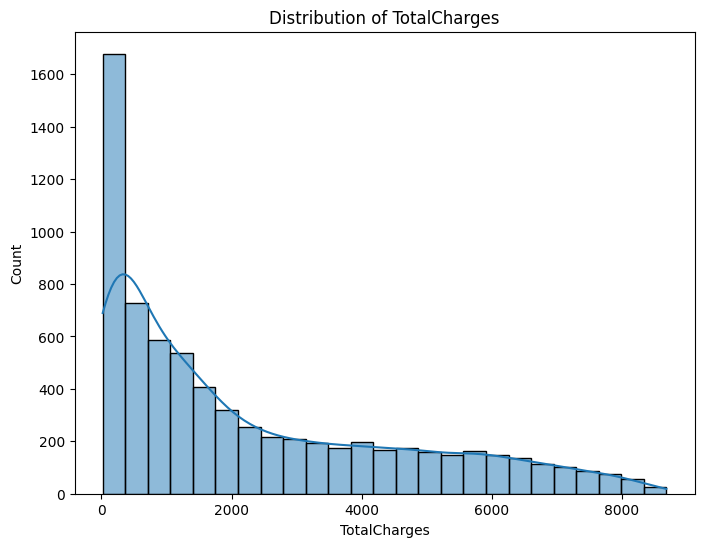

In [27]:
# Distribution of numerical variables (tenure, MonthlyCharges, TotalCharges)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=merged_new, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

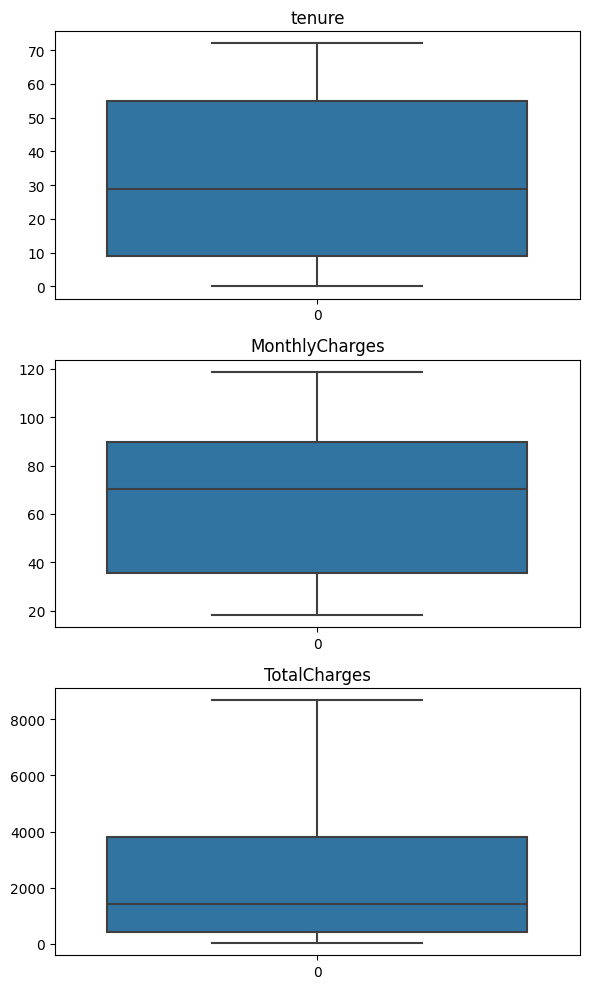

In [28]:
#Univariate Analysis
#Outlier detection of numerical column
fig, axes=plt.subplots(len(numerical_cols),1,figsize=(6,10))

for i in range (0, len(numerical_cols)):
    sns.boxplot(merged_new[numerical_cols[i]],ax=axes[i])
    axes[i].set_title(numerical_cols[i])
plt.tight_layout()
plt.show()


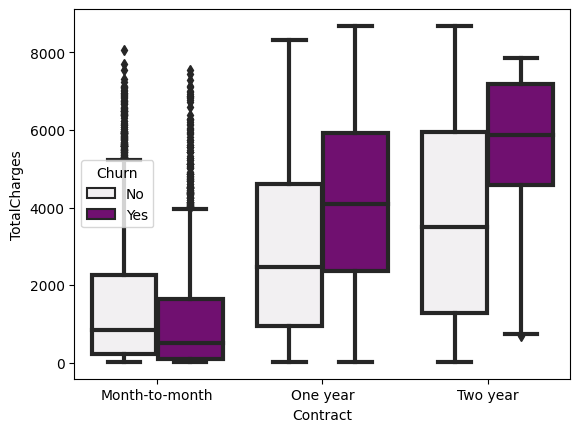

In [29]:
#Another way to check outliers using two columns
sns.boxplot(y='TotalCharges',x='Contract',data=merged_new,color='purple',linewidth=3,hue='Churn')
plt.show()

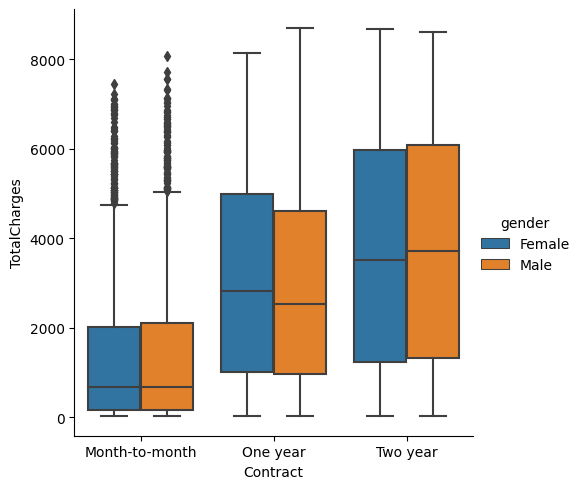

In [30]:
sns.catplot(x='Contract',y='TotalCharges',hue='gender',kind='box',data=merged_new)

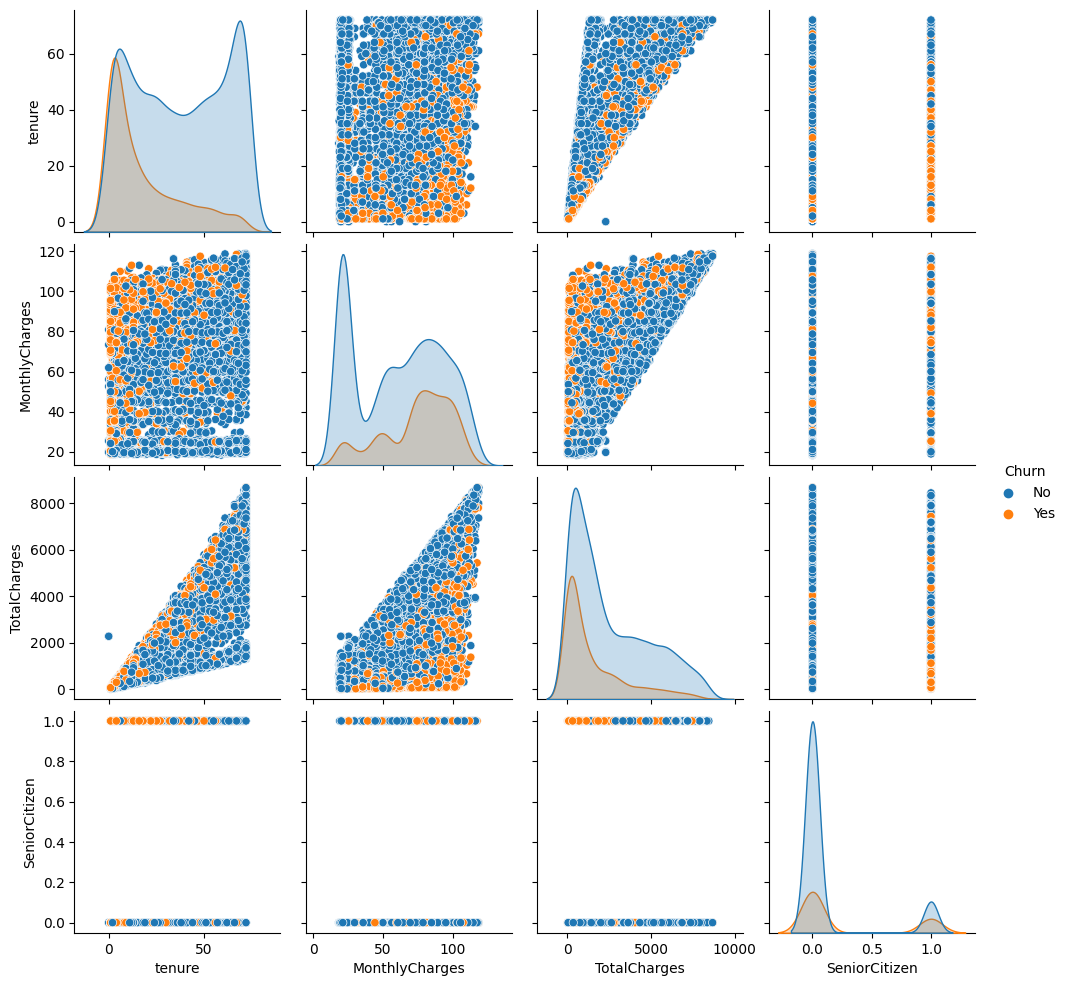

In [31]:
#Relationship of dataset columns with respect to Churn
sns.pairplot(data=merged_new,hue='Churn')

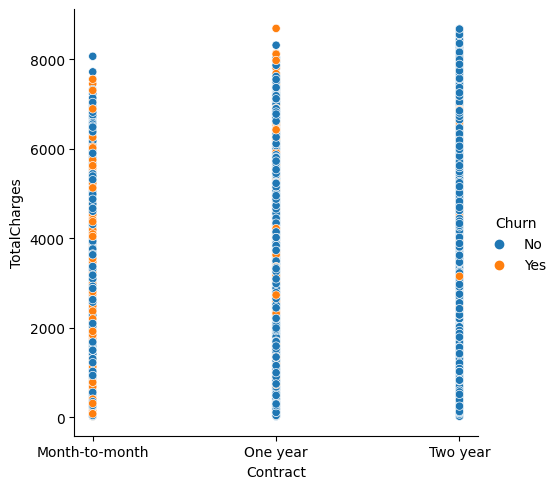

In [32]:
sns.relplot(x="Contract",y='TotalCharges',hue='Churn',data=merged_new)

Insights:

Here we can see that the Month-to-month and one year Contract customers have churned. But in case of two years, most of the customers have not churned

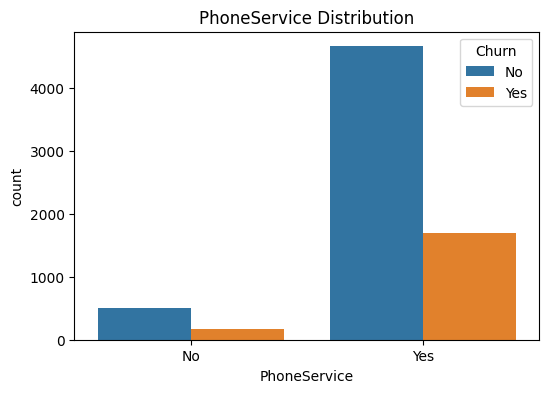

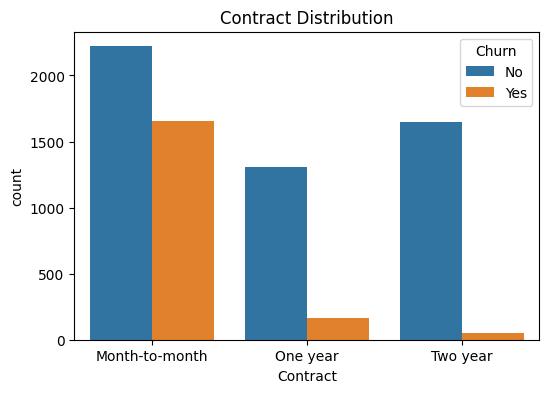

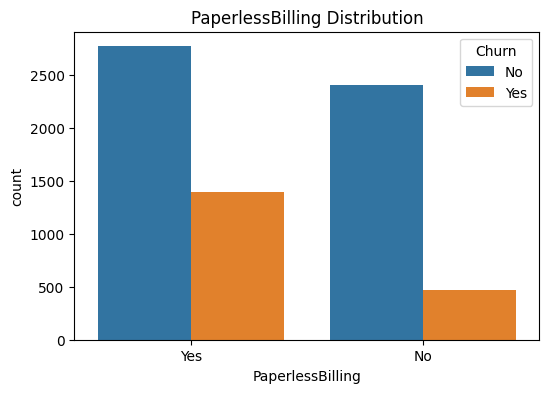

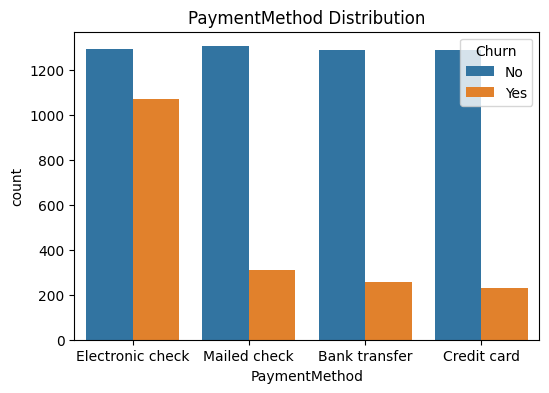

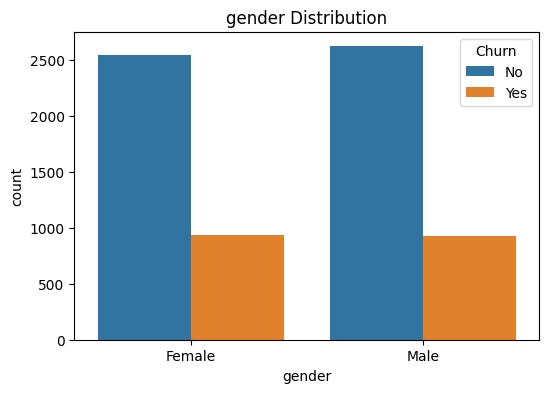

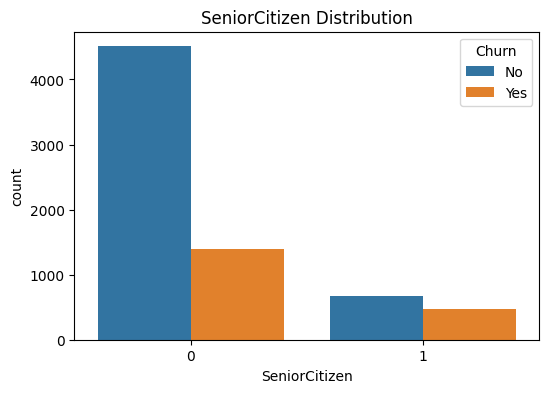

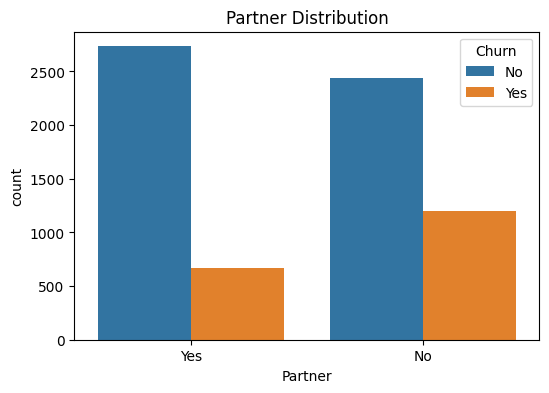

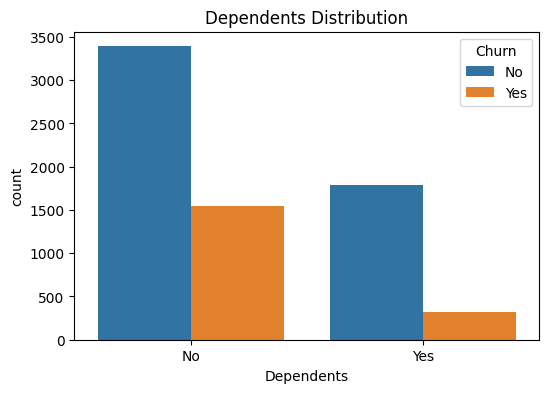

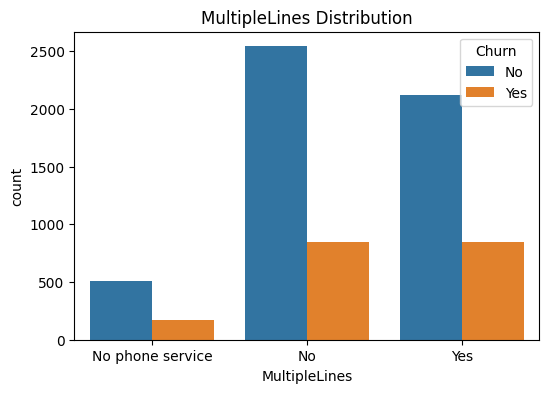

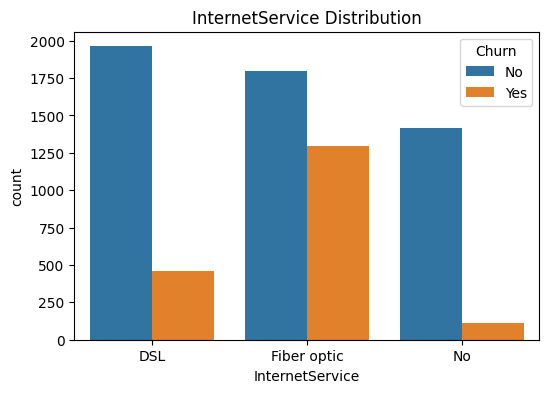

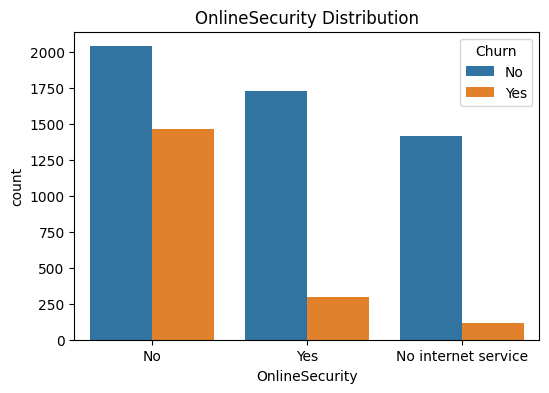

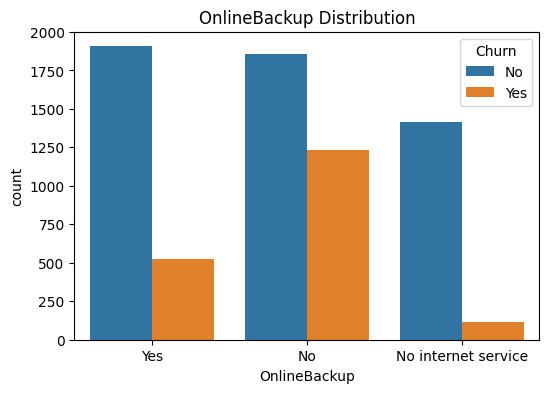

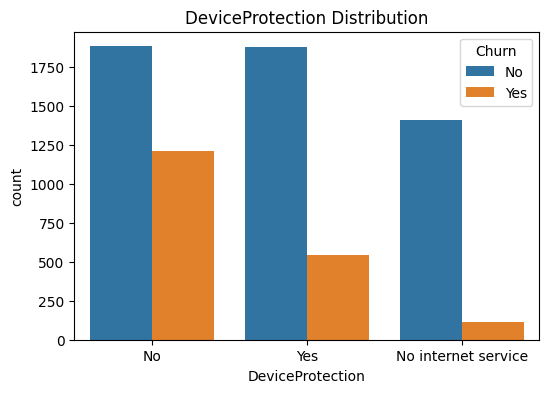

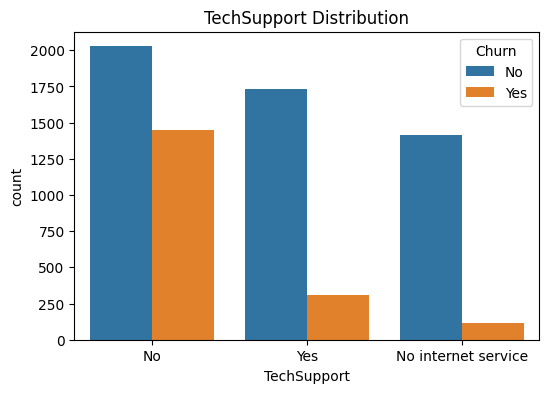

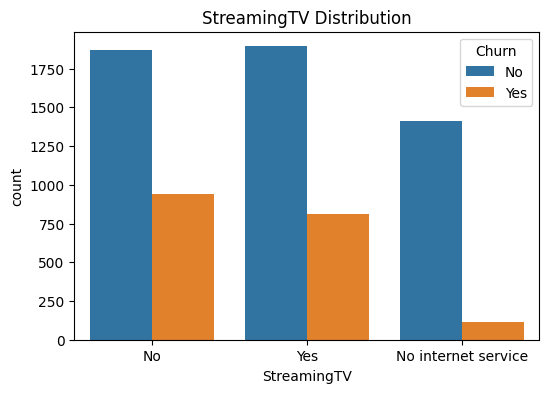

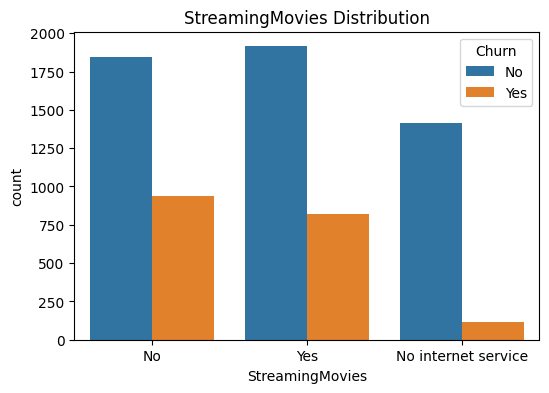

In [33]:
# Distribution of categorical variables
categorical_cols = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen',
                    'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=merged_new, x=col, hue='Churn')
    plt.title(f'{col} Distribution')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

In [34]:
for column in merged_new.columns:
    # Check unique values in the column
    unique_values = merged_new[column].unique()

    print("Unique values for column:", column)
    print(unique_values)
    print()

Unique values for column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values for column: PhoneService
['No' 'Yes']

Unique values for column: Contract
['Month-to-month' 'One year' 'Two year']

Unique values for column: PaperlessBilling
['Yes' 'No']

Unique values for column: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']

Unique values for column: MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

Unique values for column: TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Unique values for column: Churn
['No' 'Yes']

Unique values for column: gender
['Female' 'Male']

Unique values for column: SeniorCitizen
[0 1]

Unique values for column: Partner
['Yes' 'No']

Unique values for column: Dependents
['No' 'Yes']

Unique values for column: 

In [35]:
merged_new.replace('No internet service','No',inplace=True)
merged_new.replace('No phone service','No',inplace=True)

In [36]:
#Converting yes/No to 0/1
Cat_var =['PhoneService','PaperlessBilling','Partner','Dependents','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']

#binarymap function
def binary_map(x):
  return x.map({'Yes':1,'No':0})

merged_new[Cat_var]=merged_new[Cat_var].apply(binary_map)

In [37]:
for column in merged_new.columns:
    # Check unique values in the column
    unique_values = merged_new[column].unique()

    print("Unique values for column:", column)
    print(unique_values)
    print()

Unique values for column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values for column: PhoneService
[0 1]

Unique values for column: Contract
['Month-to-month' 'One year' 'Two year']

Unique values for column: PaperlessBilling
[1 0]

Unique values for column: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']

Unique values for column: MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

Unique values for column: TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Unique values for column: Churn
[0 1]

Unique values for column: gender
['Female' 'Male']

Unique values for column: SeniorCitizen
[0 1]

Unique values for column: Partner
[1 0]

Unique values for column: Dependents
[0 1]

Unique values for column: MultipleLines
[0 1]

Unique values 

<ipython-input-38-362a57c0e8b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_new.corr(), annot=True, cmap='coolwarm',ax=ax)


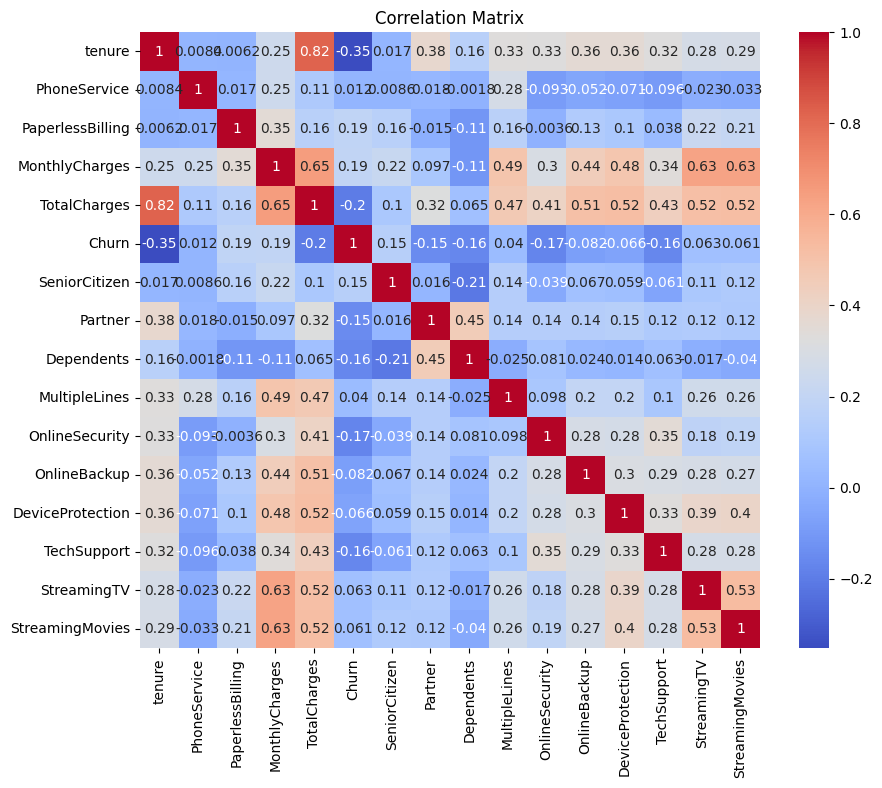

In [38]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(merged_new.corr(), annot=True, cmap='coolwarm',ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [39]:
#Encoding categorical data
Churn_rate = pd.get_dummies(data=merged_new, columns=['Contract','PaymentMethod','gender','InternetService'])
Churn_rate

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,...,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,0,0,1,1,1,...,0,0,0,0,1,0,1,1,0,0
7039,72,1,1,103.20,7362.90,0,0,1,1,1,...,0,0,1,0,0,1,0,0,1,0
7040,11,0,1,29.60,346.45,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
7041,4,1,1,74.40,306.60,1,1,1,0,1,...,0,0,0,0,1,0,1,0,1,0


Mutual Information

In [40]:
Churn_rate.dtypes

tenure                              int64
PhoneService                        int64
PaperlessBilling                    int64
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int64
SeniorCitizen                       int64
Partner                             int64
Dependents                          int64
MultipleLines                       int64
OnlineSecurity                      int64
OnlineBackup                        int64
DeviceProtection                    int64
TechSupport                         int64
StreamingTV                         int64
StreamingMovies                     int64
Contract_Month-to-month             uint8
Contract_One year                   uint8
Contract_Two year                   uint8
PaymentMethod_Bank transfer         uint8
PaymentMethod_Credit card           uint8
PaymentMethod_Electronic check      uint8
PaymentMethod_Mailed check          uint8
gender_Female                     

In [41]:
#Mutual Information Scores
X = Churn_rate.copy()
y = X.pop("Churn")

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

tenure                            0.079378
Contract_Month-to-month           0.076431
Contract_Two year                 0.072864
MonthlyCharges                    0.050641
TotalCharges                      0.043502
PaymentMethod_Electronic check    0.038125
InternetService_Fiber optic       0.036854
InternetService_No                0.035756
Contract_One year                 0.022146
Partner                           0.021012
PaperlessBilling                  0.018501
OnlineSecurity                    0.017708
SeniorCitizen                     0.014707
PaymentMethod_Credit card         0.013516
gender_Female                     0.013017
TechSupport                       0.012011
PaymentMethod_Mailed check        0.010094
Dependents                        0.010010
DeviceProtection                  0.006925
InternetService_DSL               0.006836
OnlineBackup                      0.002150
PhoneService                      0.001628
gender_Male                       0.000000
MultipleLin

In [42]:
#Insights:

#As seen here,StreamingTV,Streaming movies,partner,phoneservice,device protection,gender,online backup,multiple lines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target.
#In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.


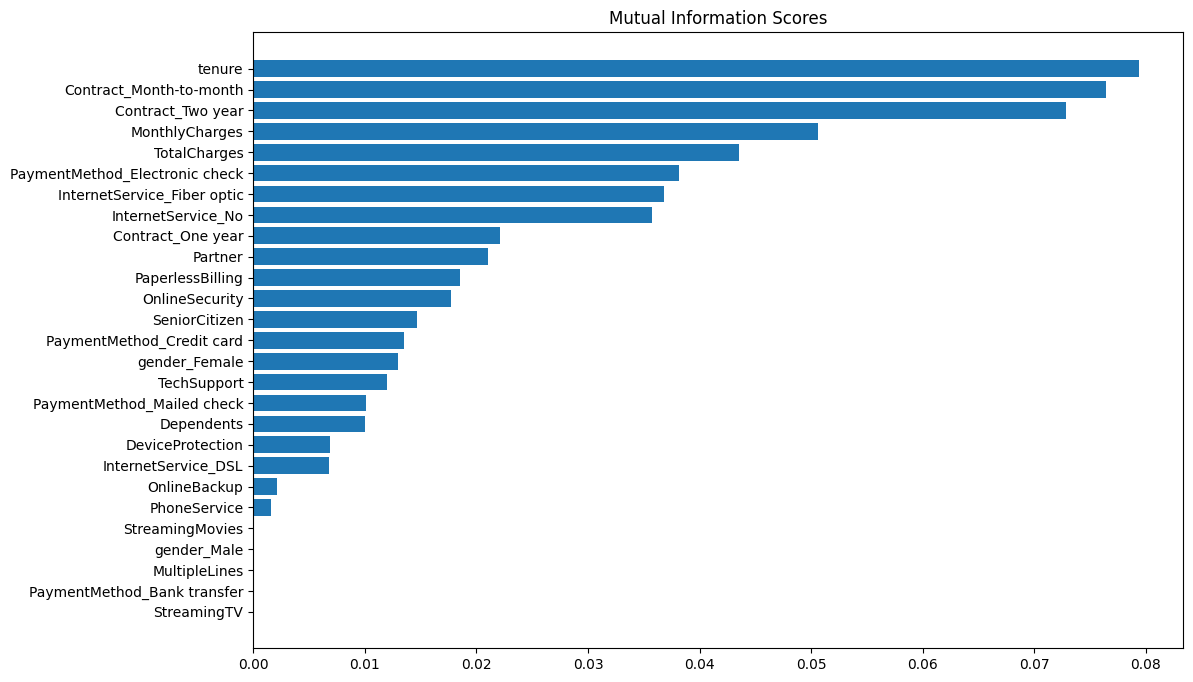

In [43]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(mi_scores)

In [44]:
Churn_rate.dtypes

tenure                              int64
PhoneService                        int64
PaperlessBilling                    int64
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int64
SeniorCitizen                       int64
Partner                             int64
Dependents                          int64
MultipleLines                       int64
OnlineSecurity                      int64
OnlineBackup                        int64
DeviceProtection                    int64
TechSupport                         int64
StreamingTV                         int64
StreamingMovies                     int64
Contract_Month-to-month             uint8
Contract_One year                   uint8
Contract_Two year                   uint8
PaymentMethod_Bank transfer         uint8
PaymentMethod_Credit card           uint8
PaymentMethod_Electronic check      uint8
PaymentMethod_Mailed check          uint8
gender_Female                     

#Feature Engineering

In [45]:
#VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
columns = ['tenure', 'PhoneService', 'PaperlessBilling', 'gender_Female', 'gender_Male', 'MonthlyCharges',
           'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

X = Churn_rate[columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)

print(vif)

    VIF Factor          features
4    12.438057       gender_Male
3    12.366092     gender_Female
6    10.111773      TotalCharges
0     5.914971            tenure
5     5.604058    MonthlyCharges
16    1.912210   StreamingMovies
15    1.907977       StreamingTV
13    1.550085  DeviceProtection
10    1.540378     MultipleLines
12    1.482060      OnlineBackup
8     1.460170           Partner
1     1.397403      PhoneService
14    1.381080       TechSupport
9     1.373782        Dependents
11    1.356706    OnlineSecurity
2     1.191840  PaperlessBilling
7     1.144047     SeniorCitizen


In [46]:
#remove gender_Male and check vif
columns = ['tenure', 'PhoneService', 'PaperlessBilling', 'gender_Female','MonthlyCharges',
           'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

X = Churn_rate[columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)

print(vif)

    VIF Factor          features
4    25.513228    MonthlyCharges
5    13.883405      TotalCharges
0    10.703846            tenure
1    10.320468      PhoneService
15    3.124013   StreamingMovies
14    3.097808       StreamingTV
2     2.851005  PaperlessBilling
7     2.819015           Partner
9     2.580967     MultipleLines
12    2.355812  DeviceProtection
11    2.255281      OnlineBackup
8     1.938697        Dependents
13    1.933734       TechSupport
3     1.915816     gender_Female
10    1.889424    OnlineSecurity
6     1.362509     SeniorCitizen


In [47]:
#remove total charges and check vif
columns = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
           'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

X = Churn_rate[columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)

print(vif)

    VIF Factor          features
3    23.087757    MonthlyCharges
1     8.917279      PhoneService
0     4.466578            tenure
13    3.090129   StreamingMovies
12    3.057111       StreamingTV
5     2.817027           Partner
2     2.795499  PaperlessBilling
7     2.462073     MultipleLines
10    2.328720  DeviceProtection
9     2.197639      OnlineBackup
11    1.924970       TechSupport
6     1.920959        Dependents
8     1.876413    OnlineSecurity
4     1.360358     SeniorCitizen


In [48]:
#remove monthly charges and check vif
columns = ['tenure', 'PhoneService', 'PaperlessBilling',
           'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

X = Churn_rate[columns]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)

print(vif)

    VIF Factor          features
0     4.230875            tenure
1     3.781368      PhoneService
4     2.814913           Partner
12    2.555681   StreamingMovies
11    2.524190       StreamingTV
2     2.514409  PaperlessBilling
6     2.230539     MultipleLines
9     2.158680  DeviceProtection
8     1.970148      OnlineBackup
5     1.910172        Dependents
10    1.866990       TechSupport
7     1.754514    OnlineSecurity
3     1.314173     SeniorCitizen


In [49]:
#VIF and correlation values indicate that some of the variables are multicollinear

In [50]:
#Feature selection using univariate statistical tests - f-regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions


In [51]:
X=Churn_rate.drop(['Churn'],axis=1)
Y=Churn_rate['Churn']
# feature extraction
test = SelectKBest(score_func=f_regression, k=6)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[9.973e+02 1.004e+00 2.690e+02 2.735e+02 2.916e+02 1.640e+02 1.631e+02
 1.951e+02 1.134e+01 2.127e+02 4.796e+01 3.095e+01 1.963e+02 2.826e+01
 2.663e+01 1.382e+03 2.299e+02 7.079e+02 9.932e+01 1.293e+02 7.062e+02
 5.969e+01 5.223e-01 5.223e-01 1.103e+02 7.380e+02 3.857e+02]


In [52]:
feature_names = X.columns
scores = fit.scores_


In [53]:
sorted_scores = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)
for name, score in sorted_scores:
    print(name, ':', score)

Contract_Month-to-month : 1382.3406969768284
tenure : 997.2680104991373
InternetService_Fiber optic : 738.0460424544439
Contract_Two year : 707.9192540580717
PaymentMethod_Electronic check : 706.1950282817269
InternetService_No : 385.69858848484853
TotalCharges : 291.62902117578375
MonthlyCharges : 273.4637042077108
PaperlessBilling : 268.9852180928101
Contract_One year : 229.90574088120093
OnlineSecurity : 212.6661994031974
TechSupport : 196.25540507247965
Dependents : 195.14931377324018
SeniorCitizen : 164.04142445613448
Partner : 163.06003598399445
PaymentMethod_Credit card : 129.3309746328964
InternetService_DSL : 110.33853175234857
PaymentMethod_Bank transfer : 99.3150604959348
PaymentMethod_Mailed check : 59.686545455166325
OnlineBackup : 47.962955458203815
DeviceProtection : 30.95478043912962
StreamingTV : 28.261123665053073
StreamingMovies : 26.628665202833766
MultipleLines : 11.341439011577044
PhoneService : 1.0042664747920118
gender_Male : 0.5222569018403004
gender_Female : 0

In [54]:
feature_names = X.columns[fit.get_support()]


In [55]:
print("Selected Features:")
for feature in feature_names:
    print(feature)

Selected Features:
tenure
Contract_Month-to-month
Contract_Two year
PaymentMethod_Electronic check
InternetService_Fiber optic
InternetService_No


In [56]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X=Churn_rate.drop(['Churn'],axis=1)
Y=Churn_rate['Churn']
# feature extraction
model_lr = LogisticRegression(max_iter=400)
rfe =  RFE(estimator=model_lr, n_features_to_select=7)
fit = rfe.fit(X, Y)

In [57]:
fit.n_features_

7

In [58]:
fit.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True,  True])

In [59]:
fit.ranking_

array([17,  3,  4, 20, 21, 11, 18,  5, 16,  1,  2, 19,  1,  8,  9,  1, 12,
        1,  7,  6,  1, 10, 14, 15, 13,  1,  1])

In [60]:
feature_names = X.columns[fit.support_]
print("Selected Features:")
for feature in feature_names:
    print(feature)


Selected Features:
OnlineSecurity
TechSupport
Contract_Month-to-month
Contract_Two year
PaymentMethod_Electronic check
InternetService_Fiber optic
InternetService_No


In [61]:
#Feature Importance using Decision Tree
from sklearn.tree import  DecisionTreeClassifier


In [62]:
X=Churn_rate.drop(['Churn'],axis=1)
Y=Churn_rate['Churn']
# feature extraction
model_dt = DecisionTreeClassifier()
model_dt.fit(X, Y)
print(model_dt.feature_importances_)

[0.121 0.005 0.017 0.2   0.192 0.015 0.017 0.017 0.012 0.019 0.018 0.014
 0.016 0.008 0.012 0.165 0.003 0.001 0.011 0.012 0.017 0.015 0.013 0.022
 0.008 0.049 0.   ]


In [63]:
selected_features = X.columns[model_dt.feature_importances_.argsort()[::-1]][:6]  # Select top k features
selected_features

Index(['MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'tenure',
       'InternetService_Fiber optic', 'gender_Male'],
      dtype='object')

In [64]:
#Feature Selection using RandomForest classifier
X=Churn_rate.drop(['Churn'],axis=1)
Y=Churn_rate['Churn']
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
importances = rf_model.feature_importances_



In [65]:
# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the corresponding feature names
sorted_feature_names = X.columns[sorted_indices]

# Print the sorted feature importances and their names
for feature_name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{feature_name}: {importance}")

TotalCharges: 0.18898774949761188
MonthlyCharges: 0.17522799798681152
tenure: 0.16018920148358765
Contract_Month-to-month: 0.05946817357836098
InternetService_Fiber optic: 0.03468122254926413
PaymentMethod_Electronic check: 0.03366716291260316
PaperlessBilling: 0.025963764493867572
Partner: 0.023134228799510034
OnlineBackup: 0.020579372649303266
TechSupport: 0.020398564140937554
SeniorCitizen: 0.02028637373445721
OnlineSecurity: 0.020223110241855854
Contract_Two year: 0.01939471787213263
Dependents: 0.019227036651365367
MultipleLines: 0.01902710371219554
DeviceProtection: 0.01773818675668304
StreamingMovies: 0.017365688556730763
gender_Male: 0.016814291888577797
StreamingTV: 0.016810493551396206
gender_Female: 0.016767893779029496
InternetService_No: 0.013009539519155403
PaymentMethod_Mailed check: 0.011699348862260128
PaymentMethod_Credit card: 0.011348041020371862
PaymentMethod_Bank transfer: 0.011159985648325535
InternetService_DSL: 0.01107329867264383
Contract_One year: 0.009256023

In [66]:
#Drop the unrelated X variables based on feature selection and Split the data
X=Churn_rate.drop(['Churn','gender_Male','gender_Female','TotalCharges','PhoneService','StreamingMovies','StreamingTV','MultipleLines'],axis=1)
y=Churn_rate['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42,stratify = y)

In [67]:
X_train.shape

(5634, 20)

In [68]:
X_test.shape

(1409, 20)

In [69]:
#FeatureScaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [70]:
#from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.compose import ColumnTransformer

#Model bldg - Logistic Regression

In [71]:
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train,y_train)
classifier_lr

LogisticRegression(random_state=0)

In [72]:
y_pred1 = classifier_lr.predict (X_test)
y_pred1

array([0, 1, 0, ..., 0, 0, 0])

In [73]:
y_test

437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64

In [74]:
#Confusion Matrix
cm_lr_stratify = confusion_matrix(y_test, y_pred1)
acc_lr_stratify = accuracy_score(y_test, y_pred1)
recall_lr_stratify = recall_score(y_test, y_pred1)
print("Logistic Regression stratify:")
print("Confusion Matrix:")
print(cm_lr_stratify)
print("Accuracy: {:.2f}%".format(acc_lr_stratify * 100.0))
print("Recall: {:.2f}%".format(recall_lr_stratify * 100.0))


Logistic Regression stratify:
Confusion Matrix:
[[926 109]
 [178 196]]
Accuracy: 79.63%
Recall: 52.41%


In [75]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [76]:
# Perform grid search with cross-validation
from sklearn.metrics import accuracy_score, recall_score, make_scorer
parameters = {'C': [0.1, 1, 10],
    'penalty': [ 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500],
    'class_weight': [None, 'balanced']},
grid_search = GridSearchCV(
    estimator=classifier_lr,
    param_grid=parameters,
    scoring=['accuracy', 'recall'],
    refit='recall',
    cv=5
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid=({'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                          'max_iter': [100, 500], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs']},),
             refit='recall', scoring=['accuracy', 'recall'])

In [77]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]
best_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]

print("Best Recall: {:.2f} %".format(best_recall * 100))
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)

Best Recall: 79.53 %
Best Accuracy: 74.42%
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [78]:
#Fit the best parameters and build the logistic regression model again
classifier_lr_strat_cv = LogisticRegression(random_state=42, C=0.1, class_weight='balanced', max_iter=100, penalty='l2', solver='liblinear')
classifier_lr_strat_cv.fit(X_train, y_train)
y_pred2 = classifier_lr_strat_cv.predict (X_test)




In [79]:
#Confusion matrix
cm_lr_stratcv = confusion_matrix(y_test, y_pred2)
acc_lr_stratcv = accuracy_score(y_test, y_pred2)
recall_lr_stratcv = recall_score(y_test, y_pred2)
print("Logistic Regression stratify after cv:")
print("Confusion Matrix:")
print(cm_lr_stratcv)
print("Accuracy: {:.2f}%".format(acc_lr_stratcv * 100.0))
print("Recall: {:.2f}%".format(recall_lr_stratcv * 100.0))


Logistic Regression stratify after cv:
Confusion Matrix:
[[738 297]
 [ 79 295]]
Accuracy: 73.31%
Recall: 78.88%


In [80]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



In [81]:
#Random Forest

In [82]:
classifier_rfc= RandomForestClassifier(n_estimators=10,random_state =42)
classifier_rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [83]:
y_pred3 = classifier_rfc.predict (X_test)

In [84]:
cm_rf_strat = confusion_matrix(y_test, y_pred3)
acc_rf_strat = accuracy_score(y_test, y_pred3)
recall_rf_strat = recall_score(y_test, y_pred3)
print("Random Forest stratify:")
print("Confusion Matrix:")
print(cm_rf_strat)
print("Accuracy: {:.2f}%".format(acc_rf_strat * 100.0))
print("Recall: {:.2f}%".format(recall_rf_strat * 100.0))

Random Forest stratify:
Confusion Matrix:
[[932 103]
 [208 166]]
Accuracy: 77.93%
Recall: 44.39%


In [85]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.44      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409



In [86]:
#Cross Validation
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None,5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'class_weight': [None, 'balanced']
}
scoring = {'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score)}


In [87]:
grid_search = GridSearchCV(classifier_rfc, param_grid,scoring=scoring,refit='recall', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'recall': make_scorer(recall_score)})

In [88]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]
best_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]

print("Best Recall: {:.2f} %".format(best_recall * 100))
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)

Best Recall: 81.07 %
Best Accuracy: 74.62%
Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [89]:
#rebuild the random forest model with best params
classifier_rfc1 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=1, min_samples_split=10, class_weight='balanced', random_state=42)
classifier_rfc1.fit(X_train, y_train)
y_pred4 = classifier_rfc1.predict (X_test)
print(classification_report(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



In [90]:
cm_rf_stratcv = confusion_matrix(y_test, y_pred4)
acc_rf_stratcv = accuracy_score(y_test, y_pred4)
recall_rf_stratcv = recall_score(y_test, y_pred4)
print("Random Forest stratify after cv:")
print("Confusion Matrix:")
print(cm_rf_strat)
print("Accuracy: {:.2f}%".format(acc_rf_stratcv * 100.0))
print("Recall: {:.2f}%".format(recall_rf_stratcv* 100.0))

Random Forest stratify after cv:
Confusion Matrix:
[[932 103]
 [208 166]]
Accuracy: 74.73%
Recall: 77.27%


In [91]:
#DecisionTree
classifier_dtc = DecisionTreeClassifier(random_state =42)
classifier_dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
 y_pred5 = classifier_dtc.predict (X_test)

In [93]:
cm_dt_strat = confusion_matrix(y_test, y_pred5)
acc_dt_strat = accuracy_score(y_test, y_pred5)
recall_dt_strat = recall_score(y_test, y_pred5)
print("Decision Tree stratify:")
print("Confusion Matrix:")
print(cm_dt_strat)
print("Accuracy: {:.2f}%".format(acc_dt_strat* 100.0))
print("Recall: {:.2f}%".format(recall_dt_strat* 100.0))

Decision Tree stratify:
Confusion Matrix:
[[851 184]
 [204 170]]
Accuracy: 72.46%
Recall: 45.45%


In [94]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1035
           1       0.48      0.45      0.47       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [95]:
#Cross validation with DT
param_grid = {
        'criterion': ['gini', 'entropy'],
    'max_depth': [ None,5,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
            'class_weight': [None, 'balanced']
}
scoring = {'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score)}



In [96]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier_dtc, param_grid=param_grid,scoring=scoring, cv=5,refit='recall',n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'recall': make_scorer(recall_score)})

In [97]:
best_parameters = grid_search.best_params_
best_recall = grid_search.best_score_

print("Best Recall: {:.2f} %".format(best_recall * 100))
print("Best Parameters:", best_parameters)

Best Recall: 79.87 %
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [98]:
#rebuild DT model with best params
classifier_dtc1 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5,
                                        min_samples_split=10, min_samples_leaf=4,
                                        class_weight='balanced')
classifier_dtc1.fit(X_train, y_train)
y_pred6 = classifier_dtc1.predict (X_test)
cm_dt_stratcv = confusion_matrix(y_test, y_pred6)
acc_dt_stratcv = accuracy_score(y_test, y_pred6)
recall_dt_stratcv = recall_score(y_test, y_pred6)
print("Decision Tree stratify after cv:")
print("Confusion Matrix:")
print(cm_dt_stratcv)
print("Accuracy: {:.2f}%".format(acc_dt_stratcv* 100.0))
print("Recall: {:.2f}%".format(recall_dt_stratcv* 100.0))


Decision Tree stratify after cv:
Confusion Matrix:
[[794 241]
 [ 95 279]]
Accuracy: 76.15%
Recall: 74.60%


In [99]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [100]:
#XGboost
# fit model
model_xgb = XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1)
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
# make predictions for test data
y_pred7 = model_xgb.predict(X_test)
predictions1 = [round(value) for value in y_pred7]

In [102]:
cm_xgb_strat = confusion_matrix(y_test, predictions1)
acc_xgb_strat = accuracy_score(y_test, predictions1)
recall_xgb_strat = recall_score(y_test, predictions1)
print("XGB stratify:")
print("Confusion Matrix:")
print(cm_xgb_strat)
print("Accuracy: {:.2f}%".format(acc_xgb_strat* 100.0))
print("Recall: {:.2f}%".format(recall_xgb_strat* 100.0))

XGB stratify:
Confusion Matrix:
[[940  95]
 [201 173]]
Accuracy: 78.99%
Recall: 46.26%


In [103]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [104]:
#Cross validation
parameters = {'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
  }
grid_search = GridSearchCV(model_xgb, param_grid=parameters,scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [105]:
# Get the best accuracy and parameters
best_recall = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Recall: {:.2f} %".format(best_recall * 100))
print("Best Parameters:", best_parameters)

Best Recall: 52.64 %
Best Parameters: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100}


In [106]:
#rebuild xgb model
model_xgb1 = XGBClassifier(n_estimators=100,max_depth=7,learning_rate=0.001)
model_xgb1.fit(X_train, y_train)
y_pred8 = model_xgb1.predict(X_test)
predictions2 = [round(value) for value in y_pred8]
cm_xgb_stratcv = confusion_matrix(y_test, predictions2)
acc_xgb_stratcv = accuracy_score(y_test, predictions2)
recall_xgb_stratcv = recall_score(y_test, predictions2)
print("XGB stratify after cv:")
print("Confusion Matrix:")
print(cm_xgb_stratcv)
print("Accuracy: {:.2f}%".format(acc_xgb_stratcv* 100.0))
print("Recall: {:.2f}%".format(recall_xgb_stratcv* 100.0))

XGB stratify after cv:
Confusion Matrix:
[[918 117]
 [181 193]]
Accuracy: 78.85%
Recall: 51.60%


In [107]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [108]:
#KNN Model
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)



KNeighborsClassifier()

In [109]:
y_pred9 = classifier_knn.predict(X_test)


In [110]:
cm_knn_strat = confusion_matrix(y_test, y_pred9)
acc_knn_strat = accuracy_score(y_test, y_pred9)
recall_knn_strat = recall_score(y_test, y_pred9)
print("KNN stratify:")
print("Confusion Matrix:")
print(cm_knn_strat)
print("Accuracy: {:.2f}%".format(acc_knn_strat* 100.0))
print("Recall: {:.2f}%".format(recall_knn_strat* 100.0))

KNN stratify:
Confusion Matrix:
[[897 138]
 [205 169]]
Accuracy: 75.66%
Recall: 45.19%


In [111]:
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1035
           1       0.55      0.45      0.50       374

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.76      0.75      1409



In [112]:
#Cross validation
#Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

In [113]:
# Create the GridSearchCV object
grid_search = GridSearchCV(classifier_knn, param_grid, scoring='recall',cv=5)

# Perform cross-validation and parameter search
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall')

In [114]:
# Get the best parameters and score
best_parameters = grid_search.best_params_
best_recall = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Recall: {:.2f} %".format(best_recall * 100))


Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Recall: 53.40 %


In [115]:
#rebuild knn model with best params
classifier_knn1 = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='ball_tree', leaf_size=20, p=1)
classifier_knn1.fit(X_train, y_train)
y_pred10 = classifier_knn1.predict(X_test)
cm_knn_stratcv = confusion_matrix(y_test, y_pred10)
acc_knn_stratcv = accuracy_score(y_test, y_pred10)
recall_knn_stratcv = recall_score(y_test, y_pred10)
print("KNN stratify after cv:")
print("Confusion Matrix:")
print(cm_knn_stratcv)
print("Accuracy: {:.2f}%".format(acc_knn_stratcv* 100.0))
print("Recall: {:.2f}%".format(recall_knn_stratcv* 100.0))

KNN stratify after cv:
Confusion Matrix:
[[889 146]
 [190 184]]
Accuracy: 76.15%
Recall: 49.20%


In [116]:
print(classification_report(y_test, y_pred10))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [117]:
#SVM model
# Create an SVM classifier
classifier_svc = SVC(kernel='rbf', random_state=42)


In [118]:
# Fit the classifier to the training data
classifier_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred11 = classifier_svc.predict(X_test)


In [119]:
cm_svm_strat = confusion_matrix(y_test, y_pred11)
acc_svm_strat = accuracy_score(y_test, y_pred11)
recall_svm_strat = recall_score(y_test, y_pred11)
print("SVM stratify:")
print("Confusion Matrix:")
print(cm_svm_strat)
print("Accuracy: {:.2f}%".format(acc_svm_strat* 100.0))
print("Recall: {:.2f}%".format(recall_svm_strat* 100.0))

SVM stratify:
Confusion Matrix:
[[919 116]
 [181 193]]
Accuracy: 78.92%
Recall: 51.60%


In [120]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [121]:
#Cross validation
# Define the parameter grid
from sklearn.metrics import make_scorer, accuracy_score, recall_score
param_grid = {'C': [0.1, 10], 'kernel': ['linear', 'rbf'],
              }
# Define the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score)}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=classifier_svc, param_grid=param_grid, scoring=scoring,refit='recall', cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 10], 'kernel': ['linear', 'rbf']},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'recall': make_scorer(recall_score)})

In [122]:
# Get the best parameters, best accuracy, and best recall
best_params = grid_search.best_params_
best_accuracy = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]
best_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]

# Print the best parameters, best accuracy, and best recall
print("Best Parameters:", best_params)
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best Recall: {:.2f}%".format(best_recall * 100))

Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Accuracy: 79.68%
Best Recall: 52.76%


In [123]:
#rebuild svc with best params
classifier_svc1 = SVC(C=10,kernel='linear', random_state=42)
classifier_svc1.fit(X_train, y_train)
y_pred12 = classifier_svc1.predict(X_test)
cm_svm_stratcv = confusion_matrix(y_test, y_pred12)
acc_svm_stratcv = accuracy_score(y_test, y_pred12)
recall_svm_stratcv = recall_score(y_test, y_pred12)
print("SVM stratify after cv:")
print("Confusion Matrix:")
print(cm_svm_stratcv)
print("Accuracy: {:.2f}%".format(acc_svm_stratcv* 100.0))
print("Recall: {:.2f}%".format(recall_svm_stratcv* 100.0))

SVM stratify after cv:
Confusion Matrix:
[[919 116]
 [182 192]]
Accuracy: 78.85%
Recall: 51.34%


In [124]:
print(classification_report(y_test, y_pred12))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#using smote to address data imbalance

In [125]:
from imblearn.over_sampling import SMOTE
# Create the SMOTE object
smote = SMOTE(random_state=42)

In [126]:
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [127]:
# Train the classifier on the resampled data- SVC
classifier_svc2 = SVC(C=10, kernel='linear', random_state=42)
classifier_svc2.fit(X_train_resampled, y_train_resampled)


SVC(C=10, kernel='linear', random_state=42)

In [128]:
y_pred13 = classifier_svc2.predict(X_test)
cm_svm_smote = confusion_matrix(y_test, y_pred13)
acc_svm_smote = accuracy_score(y_test, y_pred13)
recall_svm_smote = recall_score(y_test, y_pred13)
print("SVM Smote:")
print("Confusion Matrix:")
print(cm_svm_smote)
print("Accuracy: {:.2f}%".format(acc_svm_smote* 100.0))
print("Recall: {:.2f}%".format(recall_svm_smote* 100.0))

SVM Smote:
Confusion Matrix:
[[671 364]
 [ 67 307]]
Accuracy: 69.41%
Recall: 82.09%


In [129]:
print(classification_report(y_test, y_pred13))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1035
           1       0.46      0.82      0.59       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.69      0.71      1409



In [130]:
#Smote-KNN
classifier_knn2 = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='ball_tree', leaf_size=20, p=1)
classifier_knn2.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=9, p=1)

In [131]:
y_pred14 = classifier_knn2.predict(X_test)
cm_knn_smote = confusion_matrix(y_test, y_pred14)
acc_knn_smote = accuracy_score(y_test, y_pred14)
recall_knn_smote = recall_score(y_test, y_pred14)
print("KNN Smote:")
print("Confusion Matrix:")
print(cm_knn_smote)
print("Accuracy: {:.2f}%".format(acc_knn_smote* 100.0))
print("Recall: {:.2f}%".format(recall_knn_smote* 100.0))


KNN Smote:
Confusion Matrix:
[[762 273]
 [117 257]]
Accuracy: 72.32%
Recall: 68.72%


In [132]:
print(classification_report(y_test, y_pred14))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.48      0.69      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.71      0.68      1409
weighted avg       0.77      0.72      0.74      1409



In [133]:
#smote-xgb
model_xgb2 = XGBClassifier(n_estimators=100,max_depth=7,learning_rate=0.001)
model_xgb2.fit(X_train_resampled, y_train_resampled)
y_pred15 = model_xgb2.predict(X_test)
predictions = [round(value) for value in y_pred15]
cm_xgb_smote = confusion_matrix(y_test, predictions)
acc_xgb_smote = accuracy_score(y_test, predictions)
recall_xgb_smote = recall_score(y_test, predictions)
print("XGB Smote:")
print("Confusion Matrix:")
print(cm_xgb_smote)
print("Accuracy: {:.2f}%".format(acc_xgb_smote* 100.0))
print("Recall: {:.2f}%".format(recall_xgb_smote* 100.0))

XGB Smote:
Confusion Matrix:
[[711 324]
 [ 72 302]]
Accuracy: 71.89%
Recall: 80.75%


In [134]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1035
           1       0.48      0.81      0.60       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.73      1409



In [135]:
#smote-decision tree
classifier_dtc2 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5,
                                        min_samples_split=2, min_samples_leaf=4,
                                        class_weight='balanced')
classifier_dtc2.fit(X_train_resampled, y_train_resampled)
y_pred16 = classifier_dtc2.predict (X_test)
cm_dt_smote = confusion_matrix(y_test, y_pred16)
acc_dt_smote = accuracy_score(y_test, y_pred16)
recall_dt_smote = recall_score(y_test, y_pred16)
print("Decision Tree Smote:")
print("Confusion Matrix:")
print(cm_dt_smote)
print("Accuracy: {:.2f}%".format(acc_dt_smote* 100.0))
print("Recall: {:.2f}%".format(recall_dt_smote* 100.0))


Decision Tree Smote:
Confusion Matrix:
[[807 228]
 [107 267]]
Accuracy: 76.22%
Recall: 71.39%


In [136]:
print(classification_report(y_test,y_pred16))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



In [137]:
#smote-random forest
classifier_rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=1, min_samples_split=10, class_weight='balanced', random_state=42)
classifier_rfc2.fit(X_train_resampled, y_train_resampled)
y_pred17 = classifier_rfc2.predict (X_test)
cm_rf_smote = confusion_matrix(y_test, y_pred17)
acc_rf_smote = accuracy_score(y_test, y_pred17)
recall_rf_smote = recall_score(y_test, y_pred17)
print("Random Forest Smote:")
print("Confusion Matrix:")
print(cm_rf_smote)
print("Accuracy: {:.2f}%".format(acc_rf_smote* 100.0))
print("Recall: {:.2f}%".format(recall_rf_smote* 100.0))



Random Forest Smote:
Confusion Matrix:
[[697 338]
 [ 60 314]]
Accuracy: 71.75%
Recall: 83.96%


In [138]:
print(classification_report(y_test,y_pred17))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1035
           1       0.48      0.84      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.80      0.72      0.73      1409



In [139]:
#smote-logistic regression
classifier_lr2 = LogisticRegression(random_state=0, C=0.1, class_weight='balanced', max_iter=100, penalty='l2', solver='liblinear')
classifier_lr2.fit(X_train_resampled, y_train_resampled)
y_pred18 = classifier_lr2.predict (X_test)
cm_lr_smote = confusion_matrix(y_test, y_pred18)
acc_lr_smote = accuracy_score(y_test, y_pred18)
recall_lr_smote = recall_score(y_test, y_pred18)
print("Logistic Regression Smote:")
print("Confusion Matrix:")
print(cm_lr_smote)
print("Accuracy: {:.2f}%".format(acc_lr_smote* 100.0))
print("Recall: {:.2f}%".format(recall_lr_smote* 100.0))

Logistic Regression Smote:
Confusion Matrix:
[[745 290]
 [ 82 292]]
Accuracy: 73.60%
Recall: 78.07%


In [140]:
print(classification_report(y_test,y_pred18))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



##Adressing the data imbalance further using undersampling

In [141]:
from imblearn.under_sampling import RandomUnderSampler
X=Churn_rate.drop(['Churn'],axis=1)
y=Churn_rate['Churn']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [142]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [143]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
# Train the logistic regression model
model_logr = LogisticRegression(random_state=42, C=0.1, class_weight='balanced', max_iter=100, penalty='l2', solver='liblinear')
model_logr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [145]:
y_pred19 = model_logr.predict(X_test_scaled)


In [146]:
cm_lr_unders = confusion_matrix(y_test, y_pred19)
acc_lr_unders = accuracy_score(y_test, y_pred19)
recall_lr_unders = recall_score(y_test, y_pred19)
print("Logistic Regression Undersampled:")
print("Confusion Matrix:")
print(cm_lr_unders)
print("Accuracy: {:.2f}%".format(acc_lr_unders* 100.0))
print("Recall: {:.2f}%".format(recall_lr_unders* 100.0))

Logistic Regression Undersampled:
Confusion Matrix:
[[286  93]
 [ 76 293]]
Accuracy: 77.41%
Recall: 79.40%


In [147]:
# Evaluate the model
print(classification_report(y_test, y_pred19))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       379
           1       0.76      0.79      0.78       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



In [148]:
#Model bdg with random forest

In [149]:
classifier = RandomForestClassifier(n_estimators=10,random_state =42)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [150]:
y_pred20 = classifier.predict(X_test_scaled)


In [151]:
cm_rf_unders = confusion_matrix(y_test, y_pred20)
acc_rf_unders = accuracy_score(y_test, y_pred20)
recall_rf_unders = recall_score(y_test, y_pred20)
print("Random Forest UnderSampled:")
print("Confusion Matrix:")
print(cm_rf_unders)
print("Accuracy: {:.2f}%".format(acc_rf_unders* 100.0))
print("Recall: {:.2f}%".format(recall_rf_unders* 100.0))

Random Forest UnderSampled:
Confusion Matrix:
[[291  88]
 [105 264]]
Accuracy: 74.20%
Recall: 71.54%


In [152]:
# Evaluate the model
print(classification_report(y_test, y_pred20))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       379
           1       0.75      0.72      0.73       369

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



In [153]:
#Decision Tree model
classifier = DecisionTreeClassifier(random_state =0)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=0)

In [154]:
y_pred21 = classifier.predict (X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [155]:
cm_dt_unders = confusion_matrix(y_test, y_pred21)
acc_dt_unders = accuracy_score(y_test, y_pred21)
recall_dt_unders = recall_score(y_test, y_pred21)
print("Decision Tree UnderSampled:")
print("Confusion Matrix:")
print(cm_dt_unders)
print("Accuracy: {:.2f}%".format(acc_dt_unders* 100.0))
print("Recall: {:.2f}%".format(recall_dt_unders* 100.0))

Decision Tree UnderSampled:
Confusion Matrix:
[[298  81]
 [225 144]]
Accuracy: 59.09%
Recall: 39.02%


In [156]:
# Evaluate the model
print(classification_report(y_test, y_pred21))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       379
           1       0.64      0.39      0.48       369

    accuracy                           0.59       748
   macro avg       0.60      0.59      0.57       748
weighted avg       0.60      0.59      0.57       748



In [157]:
#train the model with XGboost
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [158]:
# make predictions for test data
y_pred22 = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred22]

In [159]:
cm_xgb_unders = confusion_matrix(y_test, y_pred22)
acc_xgb_unders = accuracy_score(y_test, y_pred22)
recall_xgb_unders = recall_score(y_test, y_pred22)
print("XGB UnderSampled:")
print("Confusion Matrix:")
print(cm_xgb_unders)
print("Accuracy: {:.2f}%".format(acc_xgb_unders* 100.0))
print("Recall: {:.2f}%".format(recall_xgb_unders* 100.0))

XGB UnderSampled:
Confusion Matrix:
[[277 102]
 [ 76 293]]
Accuracy: 76.20%
Recall: 79.40%


In [160]:
print(classification_report(y_test, y_pred22))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       379
           1       0.74      0.79      0.77       369

    accuracy                           0.76       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.76      0.76      0.76       748



##Adressing the data imbalance further using oversampling

In [161]:

from imblearn.over_sampling import RandomOverSampler
X=Churn_rate.drop(['Churn'],axis=1)
y=Churn_rate['Churn']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [162]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [163]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
# Train the logistic regression model
model_logreg = LogisticRegression(random_state=42, C=0.1, class_weight='balanced', max_iter=100, penalty='l2', solver='liblinear')
model_logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [165]:
y_pred23 = model_logreg.predict(X_test_scaled)


In [166]:
cm_lr_overs = confusion_matrix(y_test, y_pred23)
acc_lr_overs = accuracy_score(y_test, y_pred23)
recall_lr_overs = recall_score(y_test, y_pred23)
print("Logistic Regression OverSampled:")
print("Confusion Matrix:")
print(cm_lr_overs)
print("Accuracy: {:.2f}%".format(acc_lr_overs* 100.0))
print("Recall: {:.2f}%".format(recall_lr_overs* 100.0))

Logistic Regression OverSampled:
Confusion Matrix:
[[760 261]
 [188 861]]
Accuracy: 78.31%
Recall: 82.08%


In [167]:
# Evaluate the model
print(classification_report(y_test, y_pred23))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1021
           1       0.77      0.82      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [168]:
#Model bldg with random forest
classifier_randfc =RandomForestClassifier(n_estimators=10,random_state =42)
classifier_randfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [169]:
y_pred24 = classifier_randfc.predict(X_test_scaled)


In [170]:
cm_rf_overs = confusion_matrix(y_test, y_pred24)
acc_rf_overs = accuracy_score(y_test, y_pred24)
recall_rf_overs = recall_score(y_test, y_pred24)
print("Random Forest OverSampled:")
print("Confusion Matrix:")
print(cm_rf_overs)
print("Accuracy: {:.2f}%".format(acc_rf_overs* 100.0))
print("Recall: {:.2f}%".format(recall_rf_overs* 100.0))

Random Forest OverSampled:
Confusion Matrix:
[[871 150]
 [ 74 975]]
Accuracy: 89.18%
Recall: 92.95%


In [171]:
# Evaluate the model
print(classification_report(y_test, y_pred24))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1021
           1       0.87      0.93      0.90      1049

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070



In [172]:
#Decision Tree model
classifier_dect = DecisionTreeClassifier(criterion='entropy',random_state =0)
classifier_dect.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [173]:
 y_pred25 = classifier_dect.predict (X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [174]:
cm_dt_overs = confusion_matrix(y_test, y_pred25)
acc_dt_overs = accuracy_score(y_test, y_pred25)
recall_dt_overs = recall_score(y_test, y_pred25)
print("Decision Tree OverSampled:")
print("Confusion Matrix:")
print(cm_dt_overs)
print("Accuracy: {:.2f}%".format(acc_dt_overs* 100.0))
print("Recall: {:.2f}%".format(recall_dt_overs* 100.0))

Decision Tree OverSampled:
Confusion Matrix:
[[1014    7]
 [ 978   71]]
Accuracy: 52.42%
Recall: 6.77%


In [175]:
# Evaluate the model
print(classification_report(y_test, y_pred25))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1021
           1       0.91      0.07      0.13      1049

    accuracy                           0.52      2070
   macro avg       0.71      0.53      0.40      2070
weighted avg       0.71      0.52      0.40      2070



In [176]:
#train the oversampled model with XG boost
model_xgboost = XGBClassifier(n_estimators=90,max_depth=3)
model_xgboost.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [177]:
# make predictions for test data
y_pred26 = model_xgboost.predict(X_test_scaled)
predictions = [round(value) for value in y_pred26]

In [178]:
# evaluate predictions
cm_xgb_overs = confusion_matrix(y_test, y_pred26)
acc_xgb_overs = accuracy_score(y_test, y_pred26)
recall_xgb_overs = recall_score(y_test, y_pred26)
print("XGB OverSampled:")
print("Confusion Matrix:")
print(cm_xgb_overs)
print("Accuracy: {:.2f}%".format(acc_xgb_overs* 100.0))
print("Recall: {:.2f}%".format(recall_xgb_overs* 100.0))


XGB OverSampled:
Confusion Matrix:
[[764 257]
 [150 899]]
Accuracy: 80.34%
Recall: 85.70%


In [179]:
print(classification_report(y_test, y_pred26))


              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1021
           1       0.78      0.86      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [180]:
evaluation_matrix = pd.DataFrame(columns=['Model Variation', 'Accuracy', 'Recall'])

# Logistic Regression with Stratify
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with Stratify', 'Accuracy': acc_lr_stratify, 'Recall': recall_lr_stratify}, ignore_index=True)

# Logistic Regression with Stratify after cv metrics
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with Stratify after CV', 'Accuracy': acc_lr_stratcv, 'Recall': recall_lr_stratcv}, ignore_index=True)

# Logistic Regression with SMOTE
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with SMOTE', 'Accuracy': acc_lr_smote, 'Recall': recall_lr_smote}, ignore_index=True)

# Logistic Regression with UnderSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with UnderSampling', 'Accuracy': acc_lr_unders, 'Recall': recall_lr_unders}, ignore_index=True)

# Logistic Regression with OverSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with OverSampling', 'Accuracy': acc_lr_overs, 'Recall': recall_lr_overs}, ignore_index=True)

# Random Forest with Stratify
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Random Forest with Stratify', 'Accuracy': acc_rf_strat, 'Recall': recall_rf_strat}, ignore_index=True)

# Random Forest with Stratify after cv
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Random Forest with Stratify after CV', 'Accuracy': acc_rf_stratcv, 'Recall': recall_rf_stratcv}, ignore_index=True)

# Random Forest with smote
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Random Forest with Smote', 'Accuracy': acc_rf_smote, 'Recall': recall_rf_smote}, ignore_index=True)

# Random Forest with UnderSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Random Forest with UnderSampling', 'Accuracy': acc_rf_unders, 'Recall': recall_rf_unders}, ignore_index=True)

# Random Forest with OverSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Random Forest with OverSampling', 'Accuracy': acc_rf_overs, 'Recall': recall_rf_overs}, ignore_index=True)

# Decision Tree with Stratify
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Decision Tree with Stratify', 'Accuracy': acc_dt_strat, 'Recall': recall_dt_strat}, ignore_index=True)

# Decision Tree with Stratify after CV
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Decision Tree with Stratify after CV', 'Accuracy': acc_dt_stratcv, 'Recall': recall_dt_stratcv}, ignore_index=True)

# Decision Tree with Smote
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Decision Tree with Smote', 'Accuracy': acc_dt_smote, 'Recall': recall_dt_smote}, ignore_index=True)

# Decision Tree with UnderSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Decision Tree with UnderSampling', 'Accuracy': acc_dt_unders, 'Recall': recall_dt_unders}, ignore_index=True)

# Decision Tree with OverSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Decision Tree with OverSampling', 'Accuracy': acc_dt_overs, 'Recall': recall_dt_overs}, ignore_index=True)

# XGBoost with Stratify
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'XGBoost with Stratify', 'Accuracy': acc_xgb_strat, 'Recall': recall_xgb_strat}, ignore_index=True)

# XGBoost with Stratify after CV
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'XGBoost with Stratify after CV', 'Accuracy': acc_xgb_stratcv, 'Recall': recall_xgb_stratcv}, ignore_index=True)

# XGBoost with Smote
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'XGBoost with Smote', 'Accuracy': acc_xgb_smote, 'Recall': recall_xgb_smote}, ignore_index=True)

# XGBoost with UnderSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'XGBoost with UnderSampling', 'Accuracy': acc_xgb_unders, 'Recall': recall_xgb_unders}, ignore_index=True)

# XGBoost with OverSampling
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'XGBoost with OverSampling', 'Accuracy': acc_xgb_overs, 'Recall': recall_xgb_overs}, ignore_index=True)

# KNN with Stratify
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'KNN with Stratify', 'Accuracy': acc_knn_strat, 'Recall': recall_knn_strat}, ignore_index=True)

# KNN with Stratify after CV
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'KNN with Stratify after CV', 'Accuracy': acc_knn_stratcv, 'Recall': recall_knn_stratcv}, ignore_index=True)

# KNN with Smote
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'KNN with Smote', 'Accuracy': acc_knn_smote, 'Recall': recall_knn_smote}, ignore_index=True)

# SVM with Stratify
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'SVM with Stratify', 'Accuracy': acc_svm_strat, 'Recall': recall_svm_strat}, ignore_index=True)

# SVM with Stratify after CV
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'SVM with Stratify after CV', 'Accuracy': acc_svm_stratcv, 'Recall': recall_svm_stratcv}, ignore_index=True)

# SVM with Smote
evaluation_matrix = evaluation_matrix.append({'Model Variation': 'SVM with Smote', 'Accuracy': acc_svm_smote, 'Recall': recall_svm_smote}, ignore_index=True)


# Print the evaluation matrix
print(evaluation_matrix)

                               Model Variation  Accuracy    Recall
0            Logistic Regression with Stratify  0.796309  0.524064
1   Logistic Regression with Stratify after CV  0.733144  0.788770
2               Logistic Regression with SMOTE  0.735983  0.780749
3       Logistic Regression with UnderSampling  0.774064  0.794038
4        Logistic Regression with OverSampling  0.783092  0.820782
5                  Random Forest with Stratify  0.779276  0.443850
6         Random Forest with Stratify after CV  0.747339  0.772727
7                     Random Forest with Smote  0.717530  0.839572
8             Random Forest with UnderSampling  0.741979  0.715447
9              Random Forest with OverSampling  0.891787  0.929457
10                 Decision Tree with Stratify  0.724627  0.454545
11        Decision Tree with Stratify after CV  0.761533  0.745989
12                    Decision Tree with Smote  0.762243  0.713904
13            Decision Tree with UnderSampling  0.590909  0.39

<ipython-input-180-ce627e1798a0>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with Stratify', 'Accuracy': acc_lr_stratify, 'Recall': recall_lr_stratify}, ignore_index=True)
<ipython-input-180-ce627e1798a0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with Stratify after CV', 'Accuracy': acc_lr_stratcv, 'Recall': recall_lr_stratcv}, ignore_index=True)
<ipython-input-180-ce627e1798a0>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_matrix = evaluation_matrix.append({'Model Variation': 'Logistic Regression with SMOTE', 'Accuracy': acc_lr

Since Customer retention is the primary criteria in the problem statemnet, we focus on minimizing the false negatives, meaning reducing the prediction where a customer is identified as not churned when they actually churned.This allows for proactive actions to retain at-risk customers.Hence recall value is taken as the metric to select the best model.

In [181]:
evaluation_matrix_sorted = evaluation_matrix.sort_values(by='Recall', ascending=False)
print("Evaluation Matrix (Sorted by Recall):")
print(evaluation_matrix_sorted)

Evaluation Matrix (Sorted by Recall):
                               Model Variation  Accuracy    Recall
9              Random Forest with OverSampling  0.891787  0.929457
19                   XGBoost with OverSampling  0.803382  0.857007
7                     Random Forest with Smote  0.717530  0.839572
25                              SVM with Smote  0.694109  0.820856
4        Logistic Regression with OverSampling  0.783092  0.820782
17                          XGBoost with Smote  0.718950  0.807487
3       Logistic Regression with UnderSampling  0.774064  0.794038
18                  XGBoost with UnderSampling  0.762032  0.794038
1   Logistic Regression with Stratify after CV  0.733144  0.788770
2               Logistic Regression with SMOTE  0.735983  0.780749
6         Random Forest with Stratify after CV  0.747339  0.772727
11        Decision Tree with Stratify after CV  0.761533  0.745989
8             Random Forest with UnderSampling  0.741979  0.715447
12                    De